## Cálculo Numérico - Turma X - Atividade Prática 2
# Aluno(a) 1: Mariana Siano
# Aluno(a) 2: Quezia Emanuelly

---
## (1) Decomposição LU

A decomposição LU permite resolver sistemas lineares $A\mathbf{x} = \mathbf{b}$ ao fatorar a matriz $A$ como o produto de duas matrizes:

$$A = L \cdot U,$$
onde:
- L : Matriz triangular inferior com elementos diagonais iguais a 1,
- U : Matriz triangular superior.

Após a decomposição, o sistema original pode ser resolvido em duas etapas:
1. Resolver $L\mathbf{y} = \mathbf{b}$ por substituição direta;
2. Resolver $U\mathbf{x} = \mathbf{y}$ por substituição retroativa.

#### Faça a sua implementação (**sem utilização de funções estabelecidas**) da Decomposição LU para uma matriz quadrada $A$:

In [ ]:
# Faça a sua implementação (**sem utilização de funções estabelecidas**) da Decomposição LU para uma matriz $A$:
import numpy as np

def lu_decomposition(A):
    # Realiza a decomposição LU de uma matriz A.

    # Args:
    #     A (numpy array): Matriz quadrada de entrada.

    # Returns:
    #     L, U (numpy arrays): Matrizes triangular inferior e superior.

    n = A.shape[0]
    L = np.eye(n) # Inicializa L como matriz identidade (diagonal principal = 1)
    U = np.zeros((n, n))

    for k in range(n):
        # Preencher U (Parte superior)
        for j in range(k, n):
            sum_val = sum(L[k, p] * U[p, j] for p in range(k))
            U[k, j] = A[k, j] - sum_val

        for i in range(k + 1, n):
            sum_val = sum(L[i, p] * U[p, k] for p in range(k))
            L[i, k] = (A[i, k] - sum_val) / U[k, k]

    return L, U

# Exemplo de uso
A = np.array([[4, 3, 3], [6, 3, 2], [5, 3, 1]], dtype=float)
L, U = lu_decomposition(A)
print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)


# A saída deve ser:
# Matriz L:
# [[1.   0.   0.  ]
# [1.5  1.   0.  ]
# [1.25 0.5  1.  ]]

# Matriz U:
# [[ 4.   3.   3. ]
# [ 0.  -1.5 -2.5]
# [ 0.   0.  -1.5]]

Matriz L:
[[1.   0.   0.  ]
 [1.5  1.   0.  ]
 [1.25 0.5  1.  ]]

Matriz U:
[[ 4.   3.   3. ]
 [ 0.  -1.5 -2.5]
 [ 0.   0.  -1.5]]


---
## (2) Cálculo Matriz Inversa

Utilize a função criada no código anterior para determinar a matriz inversa $A^{−1}$ de uma matriz A que seja não-singular. Teste sua implementação com algumas matrizes de exemplo e comprove que a matriz obtida para cada caso é, de fato, a matriz inversa.

Você deve criar uma função inversa que recebe $A$ como argumento e retorna a sua inversa.



In [ ]:
import numpy as np

def lu_decomposition(A):
    # Realiza a decomposição LU de uma matriz A
    n = A.shape[0]  # Corrigido de A.share para A.shape
    L = np.eye(n)   # Corrigido de n.eye para np.eye
    U = np.zeros((n, n))

    for k in range(n):
        # Preencher U (parte superior)
        for j in range(k, n):
            soma = sum(L[k, p] * U[p, j] for p in range(k))
            U[k, j] = A[k, j] - soma

        # Preencher L (parte inferior)
        for i in range(k + 1, n):
            soma = sum(L[i, p] * U[p, k] for p in range(k))
            L[i, k] = (A[i, k] - soma) / U[k, k]

    return L, U

def inversa(A):
    # Calcula a inversa de uma matriz A usando decomposição LU.

    # Args:
    #     A (numpy array): Matriz quadrada e invertível.

    # Returns:
    #     numpy array: Matriz inversa de A.

    L, U = lu_decomposition(A)
    n = A.shape[0]
    A_inv = np.zeros((n, n))
    I = np.eye(n) # Matriz Identidade

    # Para encontrar a inversa, resolvemos o sistema Ax = e_i para cada coluna e_i da identidade.
    # Ax = e_i => LUx = e_i
    # 1. Resolver Ly = e_i (Substituição Progressiva)
    # 2. Resolver Ux = y (Substituição Retroativa)

    for k in range(n):
        b = I[:, k] # k-ésima coluna da identidade

        # 1. Substituição Progressiva (Ly = b)
        y = np.zeros(n)
        for i in range(n):
            soma = sum(L[i, j] * y[j] for j in range(i))
            y[i] = b[i] - soma # Como a diagonal de L é 1, não dividimos

        # 2. Susbtituição Retroativa (Ux = y)
        x = np.zeros(n)
        for i in range(n - 1, -1, -1):
            soma = sum(U[i, j] * x[j] for j in range(i + 1, n))
            x[i] = (y[i] - soma) / U[i, i]

        # Armazena a solução x na k-ésima coluna da matriz inversa
        A_inv[:, k] = x

    print("\nMatriz Inversa Calculada:")
    print(A_inv)
    print("\nVerificação (A * A_inv):")
    print(np.dot(A, A_inv))

    return A_inv

# Teste
A = np.array([[4, 7], [2, 6]], dtype=float)
A_inv = inversa(A)

A = np.array([[4, 3, 3], [6, 3, 2], [5, 3, 1]], dtype=float)
A_inv = inversa(A)

# A saída deve ser:

# Matriz Inversa Calculada:
# [[ 0.6 -0.7]
# [-0.2  0.4]]

# Verificação (A * A_inv):
# [[ 1.00000000e+00 -1.11022302e-16]
# [ 1.11022302e-16  1.00000000e+00]]

# Matriz Inversa Calculada:
# [[-0.33333333  0.66666667 -0.33333333]
# [ 0.44444444 -1.22222222  1.11111111]
# [ 0.33333333  0.33333333 -0.66666667]]

# Verificação (A * A_inv):
# [[ 1.00000000e+00 -2.77555756e-16 -1.11022302e-16]
# [ 1.11022302e-16  1.00000000e+00  0.00000000e+00]
# [-2.22044605e-16 -3.88578059e-16  1.00000000e+00]]



Matriz Inversa Calculada:
[[ 0.6 -0.7]
 [-0.2  0.4]]

Verificação (A * A_inv):
[[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]

Matriz Inversa Calculada:
[[-0.33333333  0.66666667 -0.33333333]
 [ 0.44444444 -1.22222222  1.11111111]
 [ 0.33333333  0.33333333 -0.66666667]]

Verificação (A * A_inv):
[[ 1.00000000e+00 -2.77555756e-16 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00  0.00000000e+00]
 [-2.22044605e-16 -3.88578059e-16  1.00000000e+00]]


---
## (3) Verificação de condicionamento


Sistemas mal condicionados são aqueles onde pequenas modificações nos coeficientes ou constantes do sistema resultam em grandes modificações em sua solução. Uma forma de se avaliar o mal condicionamento de um sistema $Ax = b$, é através do número de condição da matriz $A$, dado por:

$$cond(A) = ||A|| ||A^{−1}||$$

onde $||A||$ representa uma norma matricial, que pode ser calculada usando *np.linalg.norm(A, ord=2)*, onde ord=2 indica que a norma-2 será calculada.
Utilizando a função *inversa()*, implemente uma função chamada *condMatriz()*
que recebe uma matriz como argumento, calcula e retorna o seu número de condicionamento.

Teste sua implementação calculando o número de condição da matriz $A = [[5, −2], [−2, 4]]$, que é aproximadamente 2.69.


In [ ]:
import numpy as np

def condMatriz(A):
    # Calcula o número de condição de uma matriz A.

    # Args:
    #     A (numpy array): Matriz quadrada.

    # Returns:
    #     float: Número de condição de A.

    # Calcula a inversa de A usando a função inversa() implementada anteriormente
    A_inv = inversa(A)

    # Calcula a norma-2 de A e de sua inversa
    norm_A = np.linalg.norm(A, ord=2)
    norm_A_inv = np.linalg.norm(A_inv, ord=2)

    # Calcula o número de condição: ||A|| * ||A^-1||
    cond = norm_A * norm_A_inv

    return cond


# Teste
A = np.array([[5, -2], [-2, 4]], dtype=float)
cond = condMatriz(A)
print(f"Número de condição: {cond}")

# A saída esperada é aproximadamente 2.69


Matriz Inversa Calculada:
[[0.25   0.125 ]
 [0.125  0.3125]]

Verificação (A * A_inv):
[[1. 0.]
 [0. 1.]]
Número de condição: 2.690873457204967


---
## (4) Gauss-Seidel para matriz de Hilbert

Seja o sistema linear $\mathbf{H x}=\mathbf{b}$, onde a matriz de coeficientes e o vetor são dados por:

$$
\mathbf{H}=H_{i j}=\frac{1}{i+j+1}, \quad \text { e } \quad \mathbf{b}=b_i=\frac{1}{i+n+1}
$$

onde $n$ denota a dimensão da matriz.

Considere a matriz $\mathbf{H}$ com diferentes dimensões $n=$ $5, 10, 100, 200, 400, 600, 800, 1000 ;$ e faça:

- Resolva o sistema de equações utilizando o método de Gauss-Seidel, com critério de parada $\frac{||x^{k+1}-x^{k}||}{||x^{k+1}||} < tol$.
- Determine o erro cometido, através do resíduo calculado na norma do máximo, o qual é dado por:
$$
r=\|\mathbf{H x}-\mathbf{b}\|_{\infty}=\max _{1 \leq i \leq n}\left|H_{i j} x_j-b_i\right|, \quad \text { para } \quad i=1, \ldots, n .
$$
- Plote gráficos do número de condicionamento, número de iterações, norma do resíduo versus dimensão do sistema e discuta os resultados.

Executando Gauss-Seidel para Matriz de Hilbert (TOL = 1e-08):

--- Dimensão n = 5 ---
  kappa(H)_inf: 9.44e+05
  Iterações: 104012
  Resíduo ||Hx-b||_inf: 1.66e-09
  Erro da Solução ||x-x_exata||_inf: 4.04e-04

--- Dimensão n = 10 ---
  kappa(H)_inf: 3.54e+13
  Iterações: 86271
  Resíduo ||Hx-b||_inf: 1.35e-09
  Erro da Solução ||x-x_exata||_inf: 7.76e-03

--- Dimensão n = 100 ---
  kappa(H)_inf: 1.39e+20
  AVISO: Matriz é numericamente singular. A solução será muito imprecisa.
  Iterações: 253479
  Resíduo ||Hx-b||_inf: 4.27e-09
  Erro da Solução ||x-x_exata||_inf: 1.87e-02

--- Dimensão n = 200 ---
  kappa(H)_inf: 1.10e+20
  AVISO: Matriz é numericamente singular. A solução será muito imprecisa.
  Iterações: 436137
  Resíduo ||Hx-b||_inf: 7.53e-09
  Erro da Solução ||x-x_exata||_inf: 7.53e-03

--- Dimensão n = 400 ---
  kappa(H)_inf: 5.79e+20
  AVISO: Matriz é numericamente singular. A solução será muito imprecisa.
  Iterações: 439959
  Resíduo ||Hx-b||_inf: 1.09e-08
  Erro da Soluçã

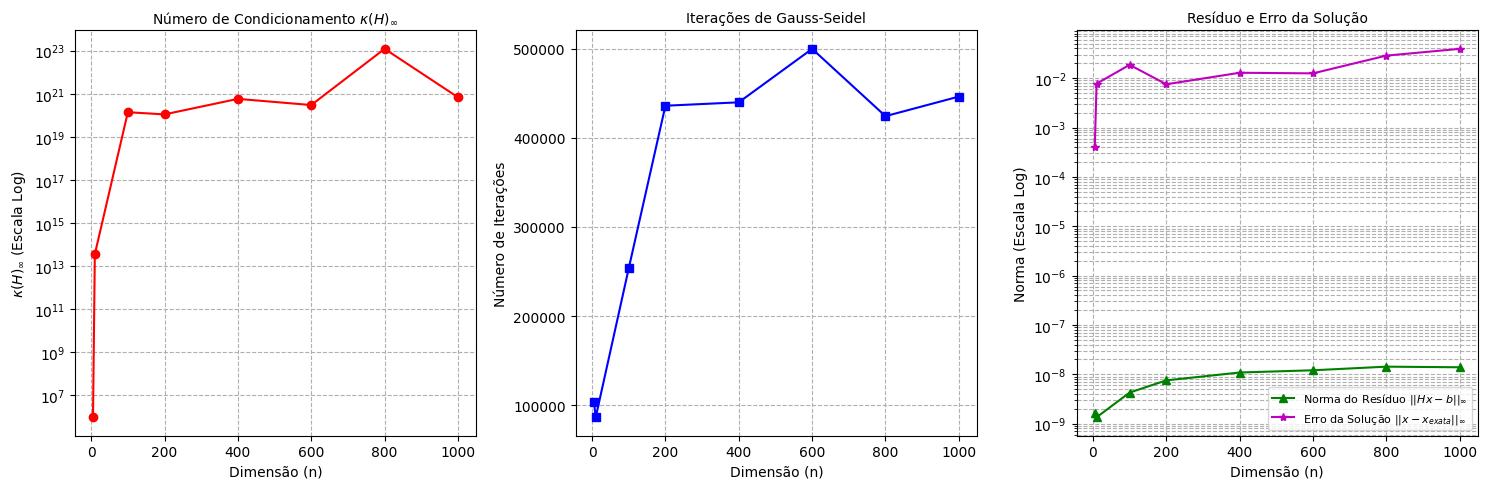

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. FUNÇÕES AUXILIARES ---
def build_hilbert_system(n):
    # Constrói a Matriz de Hilbert (H) e o vetor b tal que a solução exata é x_exata = [1, ..., 1].
    H = np.zeros((n, n))
    b = np.zeros(n)
    x_exata = np.ones(n)

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            # H_ij = 1/(i+j-1) em indexação 0
            H[i - 1, j - 1] = 1.0 / (i + j - 1)

        # O vetor b é H * x_exata
        b[i - 1] = np.sum(H[i - 1, :] * x_exata)

    return H, b, x_exata

def gauss_seidel(H, b, tol=1e-8, max_iter=500000):
    # Resolve o sistema Hx = b usando o método de Gauss-Seidel.
    n = len(b)
    x = np.zeros(n)
    x_old = np.zeros(n)
    iterations = 0

    D = np.diag(H)

    if np.any(D == 0):
        raise ValueError("Matriz com zeros na diagonal. O método de Gauss-Seidel não pode ser aplicado.")

    for k in range(max_iter):
        x_old[:] = x[:]

        for i in range(n):
            # Termo com elementos atualizados (j < i)
            s1 = np.dot(H[i, :i], x[:i])

            # Termo com elementos antigos (j > i)
            s2 = np.dot(H[i, i+1:], x_old[i+1:])

            x[i] = (b[i] - s1 - s2) / D[i]

        # Critério de Parada: ||x^(k+1) - x^k||_2 / ||x^(k+1)||_2 < tol
        diff_norm = np.linalg.norm(x - x_old, 2)
        x_norm = np.linalg.norm(x, 2)

        if x_norm == 0:
            if diff_norm < tol:
                iterations = k + 1
                break
        elif diff_norm / x_norm < tol:
            iterations = k + 1
            break

        iterations = k + 1

    return x, iterations

def calculate_residue(H, x, b):
    # Calcula o resíduo na norma do máximo (||Hx - b||_inf).
    return np.linalg.norm(np.dot(H, x) - b, np.inf)

def calculate_condition_number(H):
    # Calcula o número de condicionamento na norma do máximo (||H||_inf * ||H^-1||_inf).

    norm_H_inf = np.linalg.norm(H, np.inf)

    try:
        # Tenta calcular a inversa para o condicionamento (pode falhar/ser impreciso para n grande)
        H_inv = np.linalg.inv(H)
        norm_H_inv_inf = np.linalg.norm(H_inv, np.inf)
        condition_number = norm_H_inf * norm_H_inv_inf
    except np.linalg.LinAlgError:
        # Atribui 'inf' quando a matriz é numericamente singular
        condition_number = np.inf

    return condition_number

# --- 2. EXECUÇÃO PRINCIPAL ---
# DIMENSÕES ORIGINAIS REQUERIDAS
dimensions = [5, 10, 100, 200, 400, 600, 800, 1000]
TOLERANCE = 1e-8

# Listas para armazenar os resultados
condition_numbers = []
iterations_counts = []
residue_norms = []
solution_errors = []

print(f"Executando Gauss-Seidel para Matriz de Hilbert (TOL = {TOLERANCE}):\n")

for n in dimensions:
    print(f"--- Dimensão n = {n} ---")

    try:
        H, b, x_exata = build_hilbert_system(n)
    except MemoryError:
        print(f"ERRO: Falha na alocação de memória para n = {n}. Pulando esta dimensão.\n")
        continue

    # a) Cálculo do Número de Condicionamento
    cond_H = calculate_condition_number(H)
    condition_numbers.append(cond_H)
    print(f"  kappa(H)_inf: {cond_H:.2e}")

    if cond_H > 1e16:
        print("  AVISO: Matriz é numericamente singular. A solução será muito imprecisa.")

    # b) Resolução por Gauss-Seidel
    x_gs, num_iterations = gauss_seidel(H, b, tol=TOLERANCE)
    iterations_counts.append(num_iterations)
    print(f"  Iterações: {num_iterations}")

    # c) Cálculo do Resíduo
    residue = calculate_residue(H, x_gs, b)
    residue_norms.append(residue)
    print(f"  Resíduo ||Hx-b||_inf: {residue:.2e}")

    # d) Cálculo do Erro da Solução
    error = np.linalg.norm(x_gs - x_exata, np.inf)
    solution_errors.append(error)
    print(f"  Erro da Solução ||x-x_exata||_inf: {error:.2e}\n")

# --- 3. PLOTAGEM DOS GRÁFICOS (COM STRINGS RAW r'' CORRIGIDAS) ---

plt.figure(figsize=(15, 5))

# Gráfico 1: Número de Condicionamento vs. Dimensão
plt.subplot(1, 3, 1)
plt.plot(dimensions, condition_numbers, 'ro-')
plt.yscale('log')
plt.title(r'Número de Condicionamento $\kappa(H)_{\infty}$', fontsize=10)
plt.xlabel('Dimensão (n)', fontsize=10)
plt.ylabel(r'$\kappa(H)_{\infty}$ (Escala Log)', fontsize=10)
plt.grid(True, which="both", ls="--")


# Gráfico 2: Número de Iterações vs. Dimensão
plt.subplot(1, 3, 2)
plt.plot(dimensions, iterations_counts, 'bs-')
plt.title('Iterações de Gauss-Seidel', fontsize=10)
plt.xlabel('Dimensão (n)', fontsize=10)
plt.ylabel('Número de Iterações', fontsize=10)
plt.grid(True, ls="--")

# Gráfico 3: Norma do Resíduo (e Erro da Solução) vs. Dimensão
plt.subplot(1, 3, 3)
plt.plot(dimensions, residue_norms, 'g^-', label=r'Norma do Resíduo $||H x-b||_{\infty}$')
plt.plot(dimensions, solution_errors, 'm*-', label=r'Erro da Solução $||x-x_{exata}||_{\infty}$')
plt.yscale('log')
plt.title('Resíduo e Erro da Solução', fontsize=10)
plt.xlabel('Dimensão (n)', fontsize=10)
plt.ylabel('Norma (Escala Log)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()